# Chapter 15 : 로지스틱 회귀 분석을 통한 데이터 분류

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

## 15.1 실제 데이터에서 분류 함수 테스트하기

In [3]:
def bmw_finder(mileage,price):
    if price > 25000:
        return 1
    else:
        return 0

### 15.1.1 자동차 데이터 불러오기

In [4]:
from car_data import bmws, priuses

In [5]:
all_car_data = []
for bmw in bmws:
    all_car_data.append((bmw.mileage,bmw.price,1))
for prius in priuses:
    all_car_data.append((prius.mileage,prius.price,0))

In [8]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

### 15.1.2 분류 함수 테스트하기

In [7]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw:
            trues += 1
        else:
            falses += 1 #1
    return trues / (trues + falses)

In [9]:
test_classifier(bmw_finder, all_car_data)

0.59

### 15.1.3 연습문제

15.1 test_classifier 함수를 개선하여 참 양성, 참 음성, 거짓 양성, 거짓 음성의 개수를 출력하도록 하라. \
    bmw_finder 분류기에 대해 이 값들을 출력해서 이 분류기의 성능을 논하라.

In [14]:
def test_classifier(classifier, data, verbose=False): 
    true_positives = 0 
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for mileage, price, is_bmw in data:
        predicted = classifier(mileage,price)
        if predicted and is_bmw: 
            true_positives += 1
        elif predicted:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
            
    if verbose:        
        print("true positives %f" % true_positives) 
        print("true negatives %f" % true_negatives)
        print("false positives %f" % false_positives)
        print("false negatives %f" % false_negatives)
            
    return (true_positives + true_negatives) / len(data) 

In [15]:
test_classifier(bmw_finder,all_car_data,verbose=True)

true positives 18.000000
true negatives 100.000000
false positives 0.000000
false negatives 82.000000


0.59

15.2 bmw_finder 함수의 성능을 개선하고, test_classifier 함수로 개선한 bmw_finder 함수의 정확도가 59%보다 높음을 확인하라.

In [16]:
def bmw_finder2(mileage,price):
    if price > 20000:
        return 1
    else:
        return 0

In [17]:
test_classifier(bmw_finder2, all_car_data)

0.735

## 15.2 결정 경계 그리기

### 15.2.1 자동차 공간 그리기

In [18]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

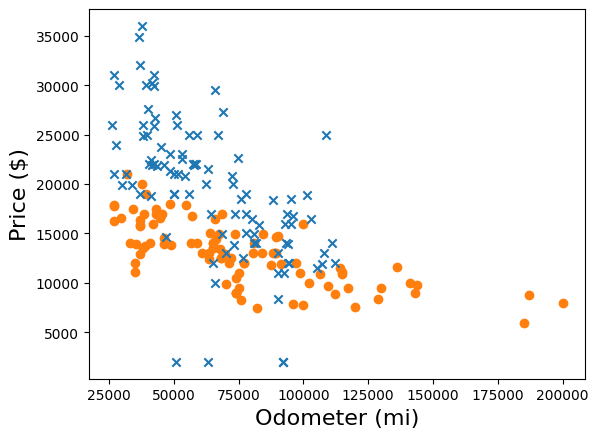

In [19]:
plot_data(all_car_data)

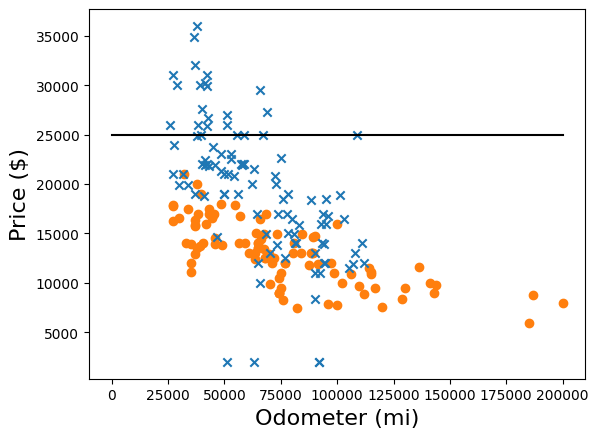

In [20]:
plot_data(all_car_data)
plot_function(lambda x: 25000, 0, 200000, c='k')

### 15.2.2 더 나은 경계 그리기

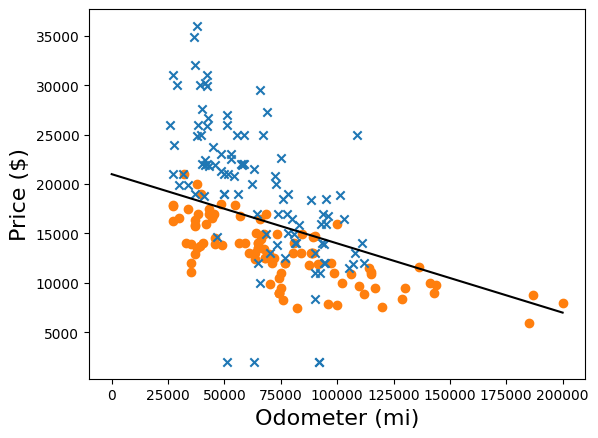

In [21]:
plot_data(all_car_data)
plot_function(lambda x: 21000 - 0.07 * x, 0, 200000, c='k')

### 15.2.3 분류 함수 구현하기

In [44]:
def decision_boundary_classify(mileage,price):
    if price > 21000 - 0.075 * mileage:
        return 1
    else:
        return 0

In [45]:
test_classifier(decision_boundary_classify, all_car_data)

0.81

### 15.2.4 연습문제

15.3 all_car_data 데이터셋에서 최적의 분류 정확도를 도출하는 p=(상수) 꼴의 결정 경계를 구하라.

In [38]:
def constant_price_classifier(cutoff_price):
    def c(x,p):
        if p > cutoff_price:
            return 1
        else:
            return 0
    return c

In [39]:
def cutoff_accuracy(cutoff_price):
    c = constant_price_classifier(cutoff_price)
    return test_classifier(c,all_car_data)

In [40]:
all_prices = [price for (mileage,price,is_bmw) in all_car_data]
max(all_prices,key=cutoff_accuracy)

17998.0

In [41]:
test_classifier(constant_price_classifier(17998.0), all_car_data)

0.795

## 15.3 회귀 문제로 분류 문제 표현하기

### 15.3.1 원본 자동차 데이터 스케일링하기

In [46]:
def make_scale(data):
    min_val = min(data) 
    max_val = max(data)
    def scale(x): 
        return (x-min_val) / (max_val - min_val)
    def unscale(y): 
        return y * (max_val - min_val) + min_val
    return scale, unscale 

price_scale, price_unscale = make_scale([x[1] for x in all_car_data]) 
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])

In [47]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) 
                    for mileage,price,is_bmw in all_car_data]

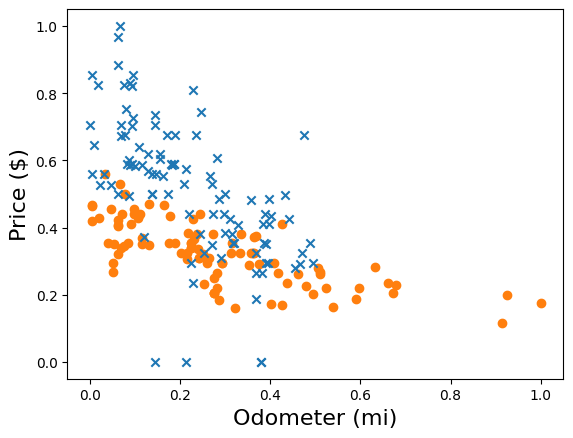

In [48]:
plot_data(scaled_car_data)

### 15.3.2 자동차의 BMW스러움을 측정하기

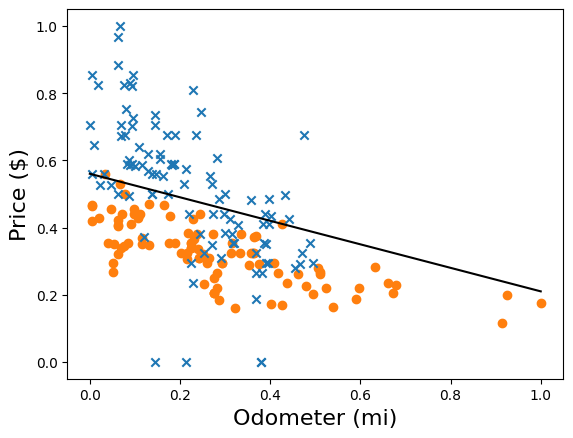

In [49]:
plot_data(scaled_car_data)
plot_function(lambda x: 0.56 - 0.35*x,0,1,c='k')

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

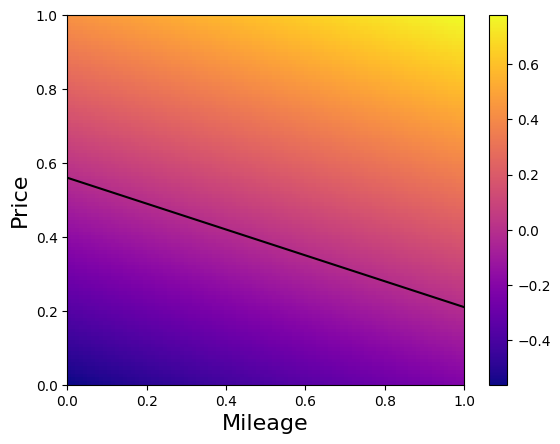

In [50]:
scalar_field_heatmap(lambda x,p: p + 0.35*x - 0.56, 0, 1,0,1)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

### 15.3.3 시그모이드 함수

In [51]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

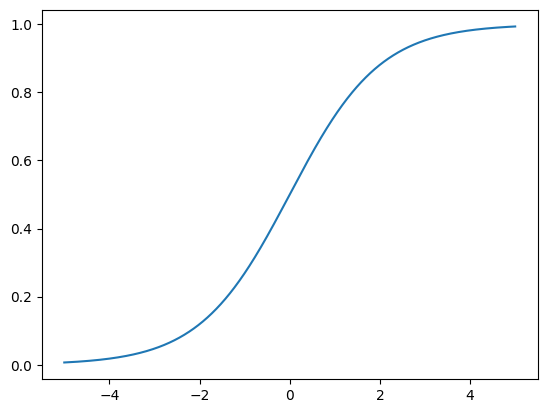

In [52]:
plot_function(sigmoid,-5,5)

### 15.3.4 다른 함수와 시그모이드 함수 합성하기

In [53]:
def f(x,p):
    return p + 0.35 * x - 0.56

def l(x,p):
    return sigmoid(f(x,p))

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

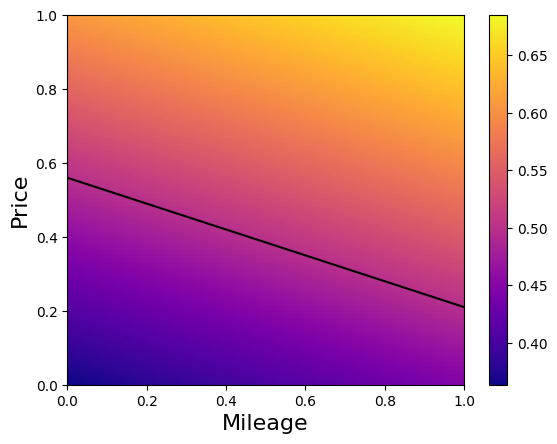

In [54]:
scalar_field_heatmap(l, 0, 1,0,1)
# plot_data(scaled_car_data,white=True)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


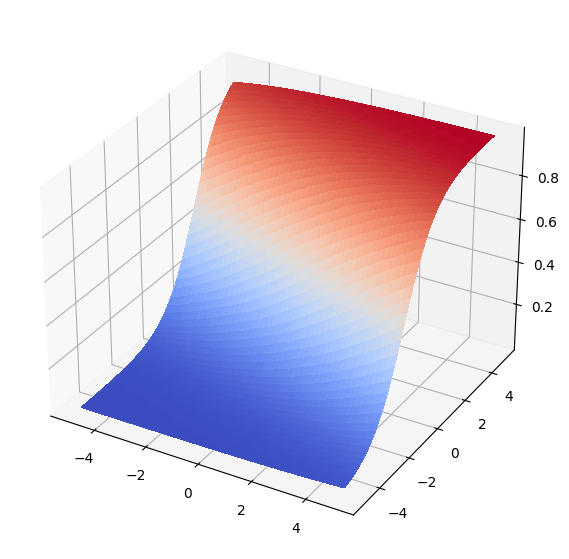

In [55]:
plot_scalar_field(l, -5, 5, -5, 5)

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


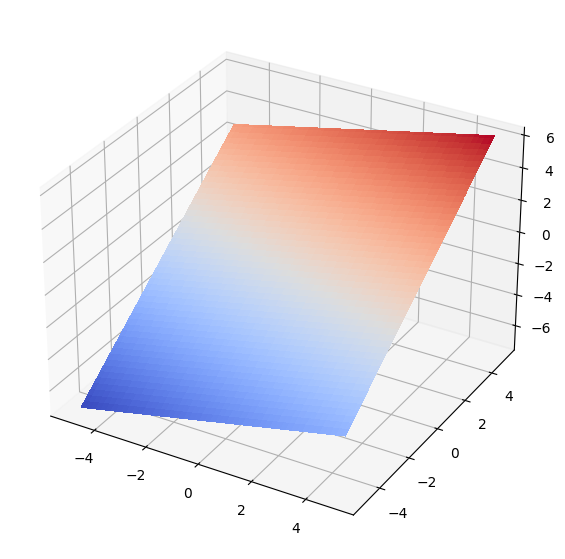

In [56]:
plot_scalar_field(f,-5,5,-5,5)

## 15.4 가능한 로지스틱 함수 살표보기

### 15.4.1 로지스틱 함수 매개변수화하기

In [57]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x + b*p - c)
    return l

### 15.4.2 로지스틱 함수의 적합도 측정하기

In [58]:
def simple_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [abs(is_bmw-l(x,p)) 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

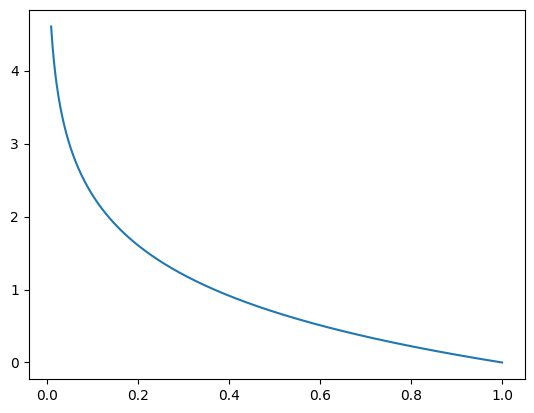

In [59]:
from math import log
plot_function(lambda x: -log(x),0.01,1)

In [60]:
-log(0.01)

4.605170185988091

In [61]:
-log(0.001)

6.907755278982137

In [62]:
def point_cost(l,x,p,is_bmw): 
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw)  
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

### 15.4.3 서로 다른 로지스틱 함수 테스트하기

In [63]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

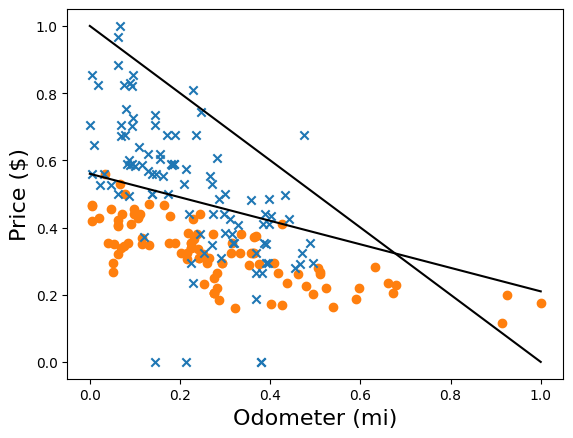

In [64]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56,)
plot_line(1,1,1)

In [65]:
logistic_cost(0.35,1,0.56)

130.92490748700456

In [66]:
logistic_cost(1,1,1)

135.56446830870456

### 15.4.4 연습문제

15.6 15.4.3 절에서 언급한 직선 ax+by=c를 $0 \leq x \leq 1$ and $0 \leq y \leq 1$ 범위에서 플로팅하는 함수 plot_line(a,b,c)를 구현하라.

In [67]:
def plot_line(acoeff, bcoeff, ccoeff, **kwargs):
    a, b, c = acoeff, bcoeff, ccoeff
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

15.8 $k(x,y) = \sigma(x^2 + y^2 - 1)$ 의 그래프 모양을 설명하라. 이 함수의 결정 경계 $k(x,y) = 0.5$ 를 만족하는 점들의 집합의 모양을 설명하라.

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


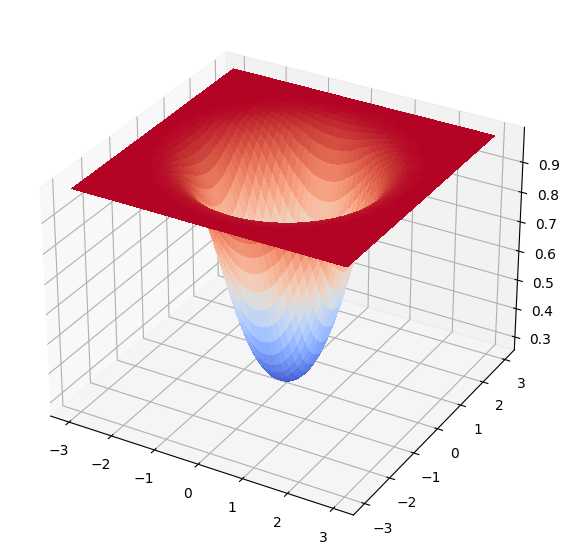

In [68]:
def k(x,y):
    return sigmoid(x**2 + y**2 - 1)
plot_scalar_field(k,-3,3,-3,3)

15.9 두 방정식 $2x + y = 1$, $4x + 2y = 2$는 같은 직선을 정의하며, 따라서 결정 경계도 같다. 그렇다면 두 로지스틱 함수 $\sigma(2x + y - 1)$, $\sigma(4x + 2y - 2)$ 는 서로 같은 함수인지 판단하라.

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


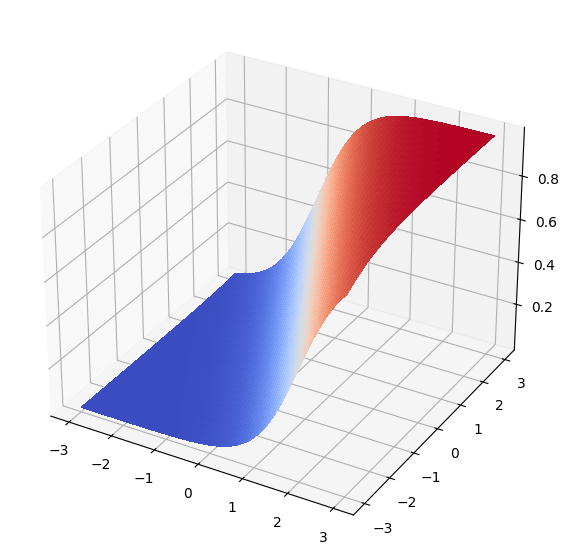

In [70]:
plot_scalar_field(lambda x,y:sigmoid(2*x+y-1),-3,3,-3,3)

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


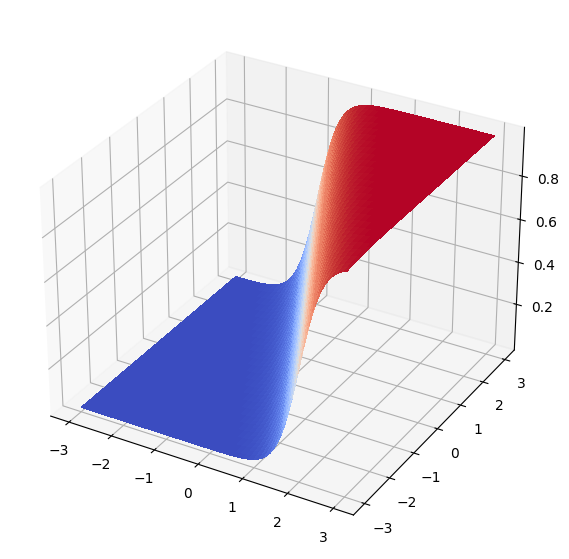

In [71]:
plot_scalar_field(lambda x,y:sigmoid(4*x+2*y-2),-3,3,-3,3)

## 15.5 최적합 로지스틱 함수 찾기

### 15.5.1 3차원에서 경사하강법

In [72]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [73]:
def approx_gradient(f, x0, y0, dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y), y0, dx=dx)
    return (partial_x, partial_y)

In [74]:
def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

In [75]:
def gradient_descent3(f,xstart,ystart,zstart,
                      tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    return x,y,z

### 15.5.2 경사하강법을 최적합 로지스틱 함수 찾기

In [76]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

(0.21114493546399946, 5.04543972557848, 2.1260122558655405)

In [77]:
gradient_descent3(logistic_cost,1,1,1,max_steps=200)

(0.884571531298388, 6.657543188981642, 2.955057286988365)

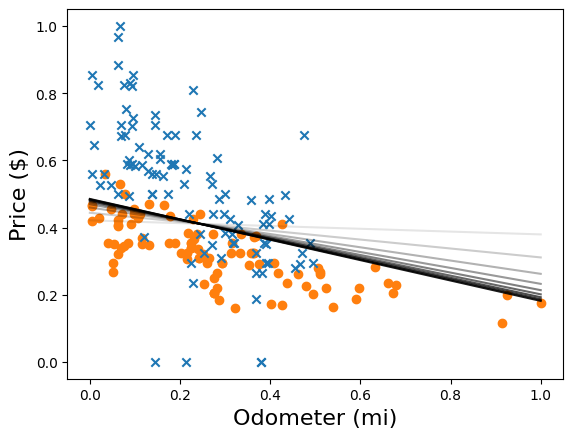

In [78]:
plot_data(scaled_car_data)
for i in range(0,1000,100):
    a,b,c = gradient_descent3(logistic_cost,1,1,1,max_steps=i)
    plot_line(a,b,c,alpha=i/1000,c='k')

In [79]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

(3.7167003153580045, 11.422062409195114, 5.596878367305919)

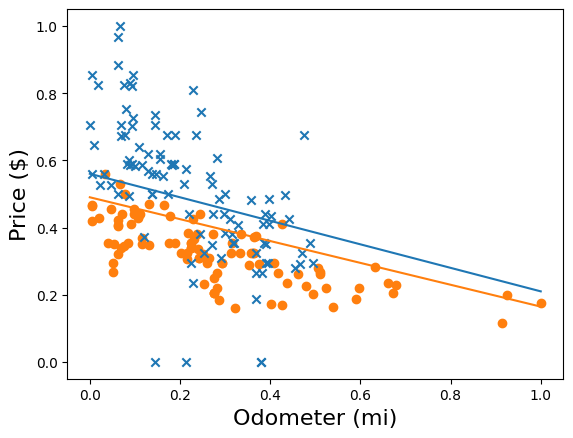

In [80]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919)

### 15.5.3 최적합 로지스틱 분류기 테스트하고 이해하기

In [81]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [82]:
test_classifier(best_logistic_classifier,scaled_car_data)

0.8

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


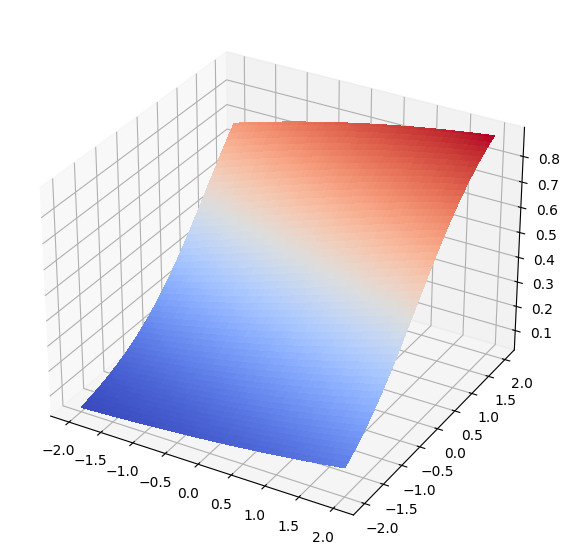

In [83]:
plot_scalar_field(make_logistic(0.35,1,0.56), -2, 2, -2, 2)

C:\Users\user\AppData\Local\Temp\ipykernel_1948\1239660822.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


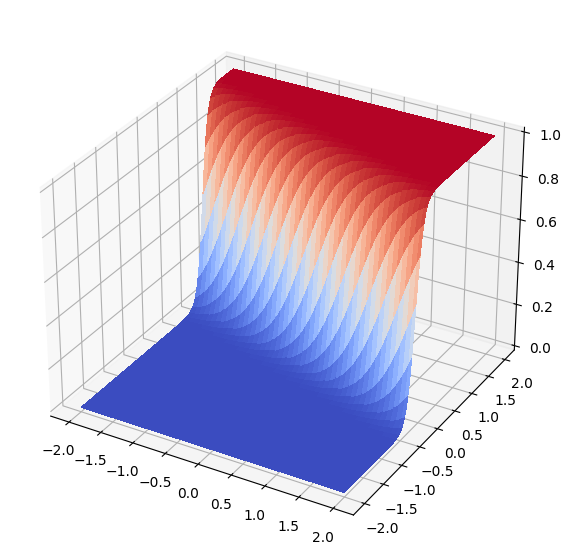

In [84]:
plot_scalar_field(make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919), -2, 2, -2, 2)

### 15.5.4 연습문제

15.11 gradient_descent3 함수를 수정해서 결과를 출력하기 전에 수행된 단계의 총 개수를 출력하게 만들어라.\
logistic_cost에 대해 경사하강법이 수렴하는 데 몇 단계나 필요한지 구하라.

In [85]:
def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    print(steps)
    return x,y,z

In [86]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

7244


(3.7167003153580045, 11.422062409195114, 5.596878367305919)

15.12

In [87]:
def partial_derivative(f,i,v,**kwargs):
    def cross_section(x):
        arg = [(vj if j != i else x) for j,vj in enumerate(v)]
        return f(*arg)
    return approx_derivative(cross_section, v[i], **kwargs)

In [88]:
def approx_gradient(f,v,dx=1e-6):
    return [partial_derivative(f,i,v) for i in range(0,len(v))]

In [89]:
def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v = vstart
    grad = approx_gradient(f,v)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        v = [(vi - 0.01 * dvi) for vi,dvi in zip(v,grad)]
        grad = approx_gradient(f,v)
        steps += 1
    return v

In [90]:
def sum_squares(*v):
    return sum([(x-1)**2 for x in v])

In [91]:
v = [2,2,2,2,2]
gradient_descent(sum_squares,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]